# Python notebook to run Scaled Poisson Model on synthetic data
### Authors: Mudassar Iqbal, Syed Murtuza Baker, Adam Farooq, Magnus Rattray

Date: 18 Jan 23

# Input Data
Some detail of the Input data

## Functions for plotting/visualisation

In [5]:
import scanpy as sc
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd
from anndata import AnnData
from numpy import genfromtxt
from datetime import datetime
from tqdm.notebook import tqdm as tqdm
from scipy.special import factorial

from multiprocessing import Pool

#from colorspacious import cspace_converter

In [6]:
cmaps = {}

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(category, cmap_list):
    # Create figure and adjust figure height to number of colormaps
    nrows = len(cmap_list)
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    fig, axs = plt.subplots(nrows=nrows + 1, figsize=(6.4, figh))
    fig.subplots_adjust(top=1 - 0.35 / figh, bottom=0.15 / figh,
                        left=0.2, right=0.99)
    axs[0].set_title(f'{category} colormaps', fontsize=14)

    for ax, name in zip(axs, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=mpl.colormaps[name])
        ax.text(-0.01, 0.5, name, va='center', ha='right', fontsize=10,
                transform=ax.transAxes)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axs:
        ax.set_axis_off()

    # Save colormap list for later.
    cmaps[category] = cmap_list

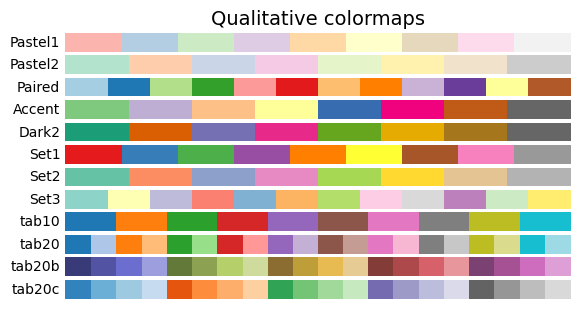

In [7]:
plot_color_gradients('Qualitative',
                     ['Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2',
                      'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b',
                      'tab20c'])

In [8]:
from anndata import AnnData

In [9]:
#def getJaccardDist(cdBinary):
    

In [10]:
import time

#time taken to read data
s_time = time.time()
cd = pd.read_csv("5000EightClusterScaledPoissionData.csv", header=None)
e_time = time.time()
print("Read without chunks: ", (e_time-s_time), "seconds")

# data
cd.sample(10)


Read without chunks:  91.50231337547302 seconds


,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
2289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1207,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3932,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# import time

# #time taken to read data
# s_time = time.time()
# cd = pd.read_csv("5000EightClusterScaledPoissionData.csv", chunksize=1000)
# e_time = time.time()
# print("Read without chunks: ", (e_time-s_time), "seconds")

# # data
# cd


In [12]:
cd.shape

(5000, 30000)

In [13]:
# Making AnnData
adata = sc.AnnData(X = cd)
adata

/home/mqbsxsm2/mambaforge/envs/r4/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/mqbsxsm2/mambaforge/envs/r4/lib/python3.10/site-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 5000 × 30000

## Filtering 

In [14]:
# === Initial peak Filtering  =====
sc.pp.filter_genes(adata,min_cells=max(20,0.01*adata.n_obs))
sc.pp.filter_genes(adata,max_cells = 0.5*adata.n_obs)
adata

AnnData object with n_obs × n_vars = 5000 × 27728
    var: 'n_cells'

In [15]:
# === Initial cell Filtering  =====
sc.pp.filter_cells(adata,min_genes=min(50,0.001*adata.n_vars))
sc.pp.filter_cells(adata,max_genes = 0.5*adata.n_vars)
adata

AnnData object with n_obs × n_vars = 4822 × 27728
    obs: 'n_genes'
    var: 'n_cells'

In [16]:
# Removing peaks that are all zero after this filtering
# need to discuss with Mudassar how to remove this step
sc.pp.filter_genes(adata,min_counts=1)
adata

AnnData object with n_obs × n_vars = 4822 × 27728
    obs: 'n_genes'
    var: 'n_cells', 'n_counts'

## Data initializing

In [17]:
# ==== Initialisation of variables ====
D = adata.n_vars # number of peaks
N = adata.n_obs #number of cells
alpha = np.zeros((N,1))
alpha = adata.X.sum(axis=1).reshape(-1,1)/max(adata.X.sum(axis=1))  # Initalizing alpha (sequencing depth - scaling factor)
alpha = alpha.reshape(-1,1)

In [18]:
sc.pp.highly_variable_genes(adata)

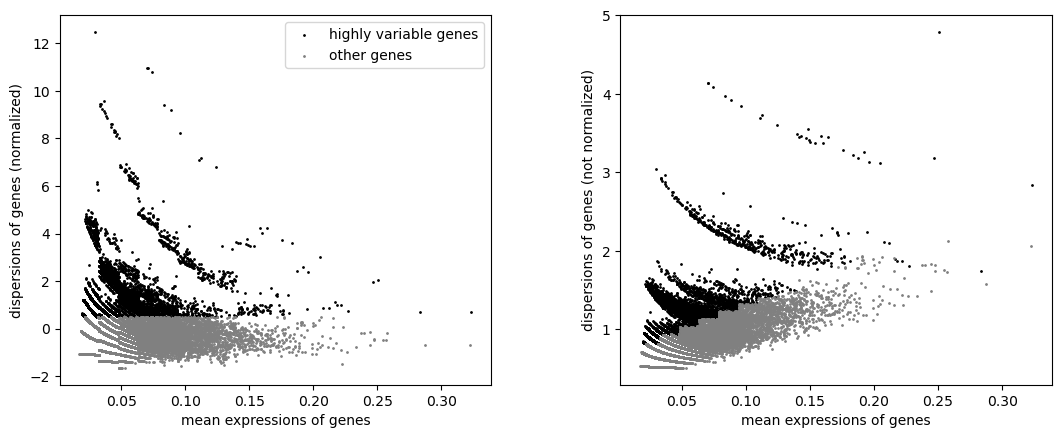

In [19]:
sc.pl.highly_variable_genes(adata)

## Defining functions Scaled Poisson EM (E-step calculation)

In [20]:
def compute_z():
    # Global variables used in this function  
    # max_z_idx  - cell cluster labels
    # lambda_i_k - parameters for mixtures (clusters, dimension = clusters x peaks)
    # N - number of cells
    # K - number of clusters (mixture components)
    # x - data matrix (rows = cells, columns = peaks) 
    # x_sel - index of selected peaks through feature selection
    
    weights = np.zeros(K)
    
    for k in range(0,K):
        weights[k] = len([i for i in max_z_idx if i==k])/N
    
    lambda_i_k[lambda_i_k<EPS] = EPS
    z_temp = np.zeros((N,K))
    for i in tqdm(range(0,N), desc='compute_z():',position=0, leave=True, colour="yellow"):
        for j in range(0,K):
            if(weights[j]!=0):
                z_temp[i,j] = np.log2(weights[j]) + \
                            np.sum(x[i,x_sel]*np.log2(lambda_i_k[j,:]*alpha[i]+EPS) - \
                              (lambda_i_k[j,:]*alpha[i]+EPS))
            else:
                z_temp[i,j] = np.sum(x[i,x_sel]*np.log2(lambda_i_k[j,:]*alpha[i]+EPS) - \
                              (lambda_i_k[j,:]*alpha[i]+EPS))
    
    
    return(z_temp)
        
  

In [21]:
## Calculate Y_i(gain in likelihood for every peak---Used for feature selection)
def calc_Y_i():
    # calculating Y_i for individual peaks, using hard EM version for z update (E-step)
    # max_z_idx  - cluster labels
    # lambda_i_k - parameters for mixtures (clusters)
    # lambda_i_0  - parameters when there is only one cluster in the data 
    # alpha  - relative sequencing depth (vector with length equal to number of cells)
    
    lambda_i_k[lambda_i_k<EPS] = EPS  
    
    # calculate Y_i for each peak
    Y = np.zeros((D,1))
    
    for i in tqdm(range(D), desc='calc_Y_i() ',position=0, leave=True, colour="green"):
        Y[i,0] = np.sum(x[:,i].reshape(-1,1)*(np.log2(alpha*lambda_i_k[max_z_idx,i]+EPS) -np.log2(alpha*lambda_i_0[:,i]+EPS)) \
                        - (alpha*lambda_i_k[max_z_idx,i] - alpha*lambda_i_0[:,i])) 
    
    
    return(Y)

In [22]:
# Total Log likelihood
def NLL_total(weights,lambda_i_k_opt):
    obj_temp = 0
    
    for i in tqdm(range(N), desc='NLL_total() ',position=0, leave=True, colour="red"):
        k = int(max_z_idx[i])        
        obj_temp = obj_temp + \
        np.log2(weights[k]) + \
        np.sum(x[i,x_sel]*np.log2(lambda_i_k[k,:]*alpha[i]+EPS) - \
                                                         (lambda_i_k[k,:]*alpha[i]+EPS) \
                                                         - np.log2(factorial(x[i,x_sel])+EPS)) 
    
    return(1.0*obj_temp)
        

In [23]:
# Sub-routine for M-step, optimising all parameters for all clusters
def calculateMu():
    # x_sel - selected peak indexes (through feature selection)
    # pi_temp - mixture weights for each cluster (pi)  
    
    mu_temp = np.zeros((K, len(x_sel)))
    
    sm1 = 0
    sm2 = 0
    
    for i in tqdm(range(0,len(x_sel)), desc='CalculateMu() ',position=0, leave=True, colour="blue"):
        for k in range(0,K):
            # ==== M-update ======
            if alpha[np.array(max_z_idx==k).flatten()].size>0:
                sm1 = np.sum(EPS+ x[np.array(max_z_idx==k).flatten(),x_sel[i]])             
                sm2 = np.sum(EPS+ alpha[np.array(max_z_idx==k).flatten()])
            else:
                sm1=np.sum(EPS)
                sm2=np.sum(EPS)
                
            mu_k_i = sm1/sm2 
            #print(f"EPS={EPS},i={i},k={k},sm1={sm1}, sm2={sm2}, mu_k_i={mu_k_i}")
            mu_temp[k,i] = mu_k_i 
    
    return(mu_temp)

In [24]:
### M-step main routine
def MaximizationStep_optim():
    pi_temp = np.zeros((K,1))
    
    for k in range(0,K):
        pi_temp[k] = np.sum(max_z_idx==k)/N
    
    lambda_i_k_opt = calculateMu() 
    objective_temp = NLL_total(pi_temp,lambda_i_k_opt)
    
    M_step_dict = {
        "pi_temp" : pi_temp,
        "lambda_i_k_opt" : lambda_i_k_opt,
        "objective_temp" : objective_temp
    }
    
    return(M_step_dict)

# Main routine 
Running for multiple number of clusters, and then choosing the best model using AIC

In [25]:


start=datetime.now()

N = adata.n_obs

EPS  = 0.000001 # small value, gloablly defined, for dealing with underflow
delta = 0.0001 # Used in EM convergence stopping criteria

x = adata.X

#x_sel = range(x.shape[1]) # Index of selected peaks, all of them initially 
x_sel = np.arange(0, x.shape[1], 1, dtype=int)

models = [2,4]#, 10, 15, 20) #  Possible number of clusters

max_z_idx1 = np.full((N, len(models)), 1) # To store labels for all models 
max_z_idx = np.full((N, 1), 1)

AC = np.full((len(models),1),1)

for i in tqdm(range(len(models))):
    # current contents of your for loop
    K = models[i] # current number of clusters
    lambda_i_k = np.zeros((K,len(x_sel))) # parameters for current model
    
    # ======== Calculate variable selection (only in case of K==2)  ======
    if(i==0):
        tmp1 = np.sum(x, axis=0)/N 
        lambda_i_0 = np.full((1,len(x_sel)),1)
        lambda_i_0[0,] = tmp1[0:len(x_sel)]
        # Quick EM
        Iter_QuickEM = 3
        converged = 0
        resEM = MaximizationStep_optim() # M-step, First iter
        objective_tmp = resEM['objective_temp']
        lambda_i_k[0:K,0:len(x_sel)] = resEM['lambda_i_k_opt']
        iter = 0
        
        while converged == 0:
            z = compute_z() # E-step 
            for l in range(0,N):
                max_z_idx[l] = np.argmax(np.array(z[l,])) # CEM
            
            resEM = MaximizationStep_optim()
            lambda_i_k[0:K,0:len(x_sel)] = resEM['lambda_i_k_opt']
            tmp = abs(resEM['objective_temp'] - objective_tmp)
            if((tmp <= delta*abs(objective_tmp)) | iter>=Iter_QuickEM): 
                converged = 1
                objective_tmp <- resEM['objective_temp']
            
            iter = iter + 1
            print(f"While loop iteration{iter}")
            objective_tmp <- resEM['objective_temp']
            
        
        Y = calc_Y_i() 
        x_sel = np.argsort(Y.flatten())[np.array(Y>np.quantile(Y, q = [0.1,0.3,0.5,0.6,0.7,0.8,0.9])[3]).flatten()]
        lambda_i_k =  lambda_i_k[:,x_sel] 
        
    # Random Restarts
    num_restarts = 5
    num_iter_restarts = 3
    max_z_idx_tmp = np.zeros((N,num_restarts))
    idx = 1
    
    for m in tqdm(range(num_restarts), desc="Number of restarts ",position=0, leave=True, colour="magenta"): # small EM to initialize
        max_z_idx_tmp[:,m] = np.random.choice(K,N,replace=True) # Making 1D
        max_z_idx = max_z_idx_tmp[:,m]
        for k in range(K):
            lambda_i_k[k,] = (np.sum(x[max_z_idx==k,x_sel.reshape(-1,1)], axis=1)+1)/(np.sum(max_z_idx==k)+1)     # ML estimator
        
        # run for num_iter_restarts iterations       
        resEM = MaximizationStep_optim() # M-step, First iter
        objective_tmp = resEM['objective_temp']
        lambda_i_k[0:K,0:len(x_sel)] = resEM['lambda_i_k_opt']
        if(m==0):
            objective_old = objective_tmp
            lambda_i_k_old = lambda_i_k
        
        iter = 0
        while tqdm(iter<=num_iter_restarts, desc=f"num_iter_restarts: {iter} "):
            z = compute_z() # E-setp
            for l in range(N):
                max_z_idx[l] = np.argmax(np.array(z[l,]))
            
            resEM = MaximizationStep_optim() 
            lambda_i_k[0:K,0:len(x_sel)] = resEM['lambda_i_k_opt']
            objective_tmp = resEM['objective_temp']
            iter = iter + 1   
        # while
                     
        if (objective_tmp < objective_old):
            objective_old = objective_tmp
            lambda_i_k_old = lambda_i_k
            idx = m

    # Final initialization using random restarts
    max_z_idx = max_z_idx_tmp[:,idx]
    objective_tmp = objective_old
    lambda_i_k   = lambda_i_k_old
    
         
    # === Main EM ======================= 
    converged = 0
    resEM = MaximizationStep_optim() # M-step, First iter
    objective_tmp = resEM['objective_temp']
    lambda_i_k[0:K,0:len(x_sel)] = resEM['lambda_i_k_opt']
    lambda_i_k_old = lambda_i_k
    iter = 0
    while(converged == 0):
        z = compute_z() # E-setp 
        for l in range(N):
            max_z_idx[l] = np.argmax(np.array(z[l,]))
         
        resEM = MaximizationStep_optim() # M-step
        lambda_i_k[0:K,0:len(x_sel)] = resEM['lambda_i_k_opt']
        lambda_i_k_old = lambda_i_k
        tmp = abs(resEM['objective_temp'] - objective_tmp)
        if(tmp <= int(delta*abs(objective_tmp)) | iter>=5):
            converged = 1
            objective_tmp = resEM['objective_temp']
         
        iter = iter + 1
        objective_tmp = resEM['objective_temp']     
        
        
    AC[i] = -2.0*1.0*objective_tmp + 2*(len(x_sel)*K+K-1) 
    max_z_idx1[:,i] = max_z_idx   
 
    print(objective_tmp)

print('Time taken: ',datetime.now()-start)


  0%|          | 0/2 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/27728 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/27728 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

While loop iteration1


compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/27728 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

While loop iteration2


compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/27728 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

While loop iteration3


compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/27728 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

While loop iteration4


calc_Y_i() :   0%|          | 0/27728 [00:00<?, ?it/s]

Number of restarts :   0%|          | 0/5 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 0 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 1 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 2 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 3 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 4 : 0it [00:00, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 0 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 1 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 2 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 3 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 4 : 0it [00:00, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 0 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 1 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 2 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 3 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 4 : 0it [00:00, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 0 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 1 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 2 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 3 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 4 : 0it [00:00, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 0 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 1 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 2 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 3 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 4 : 0it [00:00, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

[-8426198.61622491]


Number of restarts :   0%|          | 0/5 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 0 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 1 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 2 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 3 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 4 : 0it [00:00, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 0 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 1 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 2 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 3 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 4 : 0it [00:00, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 0 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 1 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 2 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 3 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 4 : 0it [00:00, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 0 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 1 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 2 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 3 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 4 : 0it [00:00, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 0 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 1 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 2 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 3 : 0it [00:00, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

num_iter_restarts: 4 : 0it [00:00, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

compute_z()::   0%|          | 0/4822 [00:00<?, ?it/s]

CalculateMu() :   0%|          | 0/11091 [00:00<?, ?it/s]

NLL_total() :   0%|          | 0/4822 [00:00<?, ?it/s]

[-8242852.11292916]
Time taken:  0:14:50.477837


In [39]:
adata.obs['clusters_SB'] = max_z_idx.astype('int')
adata.obs['clusters_SB'] = adata.obs['clusters_SB'].astype('category')

In [30]:
sc.tl.pca(adata, svd_solver='arpack')

/home/mqbsxsm2/mambaforge/envs/r4/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


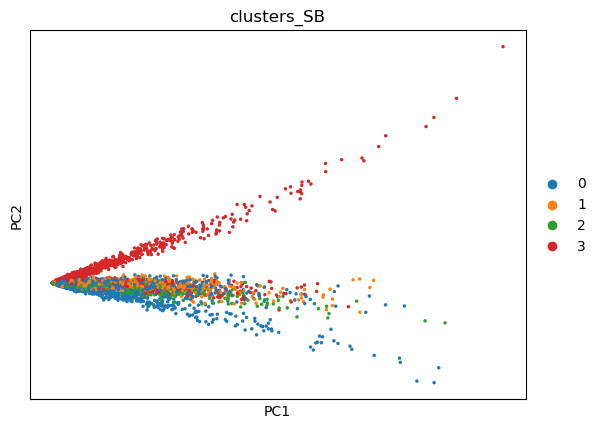

In [40]:
sc.pl.pca(adata, color='clusters_SB')

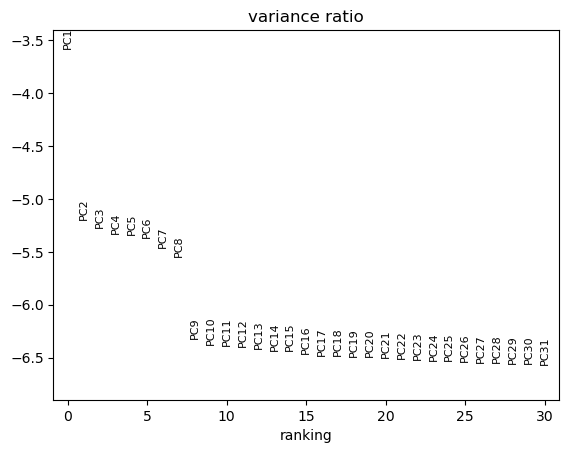

In [32]:
sc.pl.pca_variance_ratio(adata, log=True)

In [33]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=10)

In [41]:
sc.tl.paga(adata, groups='clusters_SB')
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

/home/mqbsxsm2/mambaforge/envs/r4/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


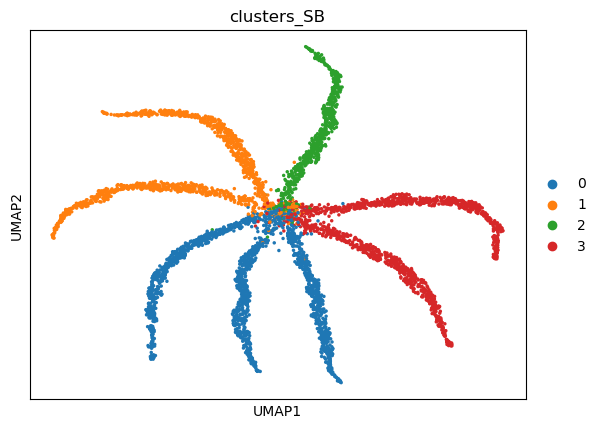

In [48]:
sc.pl.umap(adata, color=['clusters_SB'], save='c_lusters_SB.pdf')

In [44]:
sc.tl.tsne(adata)

/home/mqbsxsm2/mambaforge/envs/r4/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


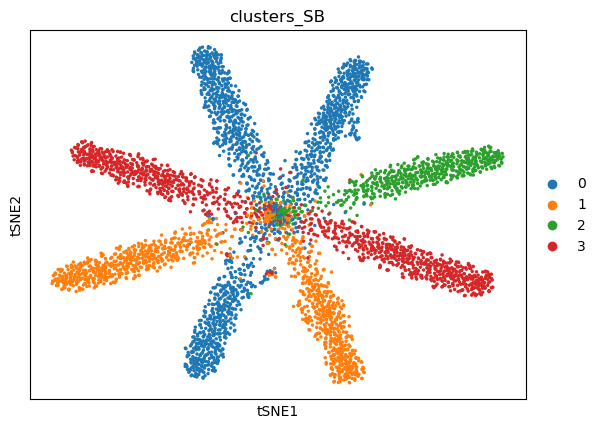

In [47]:
sc.pl.tsne(adata, color=['clusters_SB'], save='_clusters_SB.pdf')